### Is it possible to detect malicious pages using URL features?
teste_Todas

In [1]:
import tensorflow

__Etapas__:

* Análise de Dados

* Transformação dos Dados
    * Conversão para Números
    * Conversão para Binários
    
* Resultados
    * Treinamento e Classificação




Accuracy

## Códigos base para implementação de AM e de rede neural em Keras

In [2]:
import os
# os.environ['KMP_DUPLICATE_LIB_OK']='True'
import numpy as np
import pandas as pd
import time
import os
from sklearn import datasets, svm, metrics
from sklearn.datasets import make_classification
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_auc_score as sklearn_roc_auc_score
from sklearn.metrics import accuracy_score as sklearn_accuracy_score
from sklearn.metrics import confusion_matrix as sklearn_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import StratifiedKFold


import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline



In [3]:
from keras import backend as K
from keras.layers import Input, Dense, Activation, BatchNormalization, Dropout
from keras.models import Model
from keras.optimizers import Nadam, SGD,Adam
from keras.callbacks import EarlyStopping
import seaborn as sns

Using TensorFlow backend.


## Analise dos Dados da Base

#### A base do _detect malicious pages using URL_ foi utilizada como fonte de informação para que os algoritmos de aprendizadem de máquina e de redes neurais gerem modelos que prevejam se URL é maliciosa ou não.
#### Para analisa os dados da base é necessário importá-la.

In [4]:
base_path='base_URL/testeProWekaTodas.csv'
base = pd.read_csv(base_path)

### Para mostrar os 5 primeiros registros usamos a função 'head()'

In [5]:
base.head()

,qt_tok_dom_ponto,qt_tok_dom_hifen,qt_tok_dom_underline,qt_tok_dir_ponto,qt_tok_dir_barra,qt_tok_dir_interrog,qt_tok_dir_igualdade,qt_tok_dir_hifen,qt_tok_dir_underline,qt_tok_dir_arroba,...,mal_phi,presenca_marca,ip_assoc,sn_assoc,data_tempo_ativo,geo_localizacao,rank_google,rank_alexa,rbl_check,classe
0,2,0.0,0,0,0,0,0,0,0,0,...,0,0,1,6,0,AE,6,-1,24,benigna
1,2,0.0,0,0,0,0,0,0,0,0,...,0,0,1,4,0,AE,5,-1,16,benigna
2,1,0.0,0,0,0,0,0,0,0,0,...,0,0,1,2,0,AR,3,-1,8,benigna
3,3,0.0,0,0,0,0,0,0,0,0,...,0,0,1,4,0,AR,3,-1,8,benigna
4,2,0.0,0,0,0,0,0,0,0,0,...,0,0,1,3,0,AT,2,2334,10,benigna


In [6]:
colunas = base.drop(['classe'], axis=1).columns
colunas

Index(['qt_tok_dom_ponto', 'qt_tok_dom_hifen', 'qt_tok_dom_underline',
       'qt_tok_dir_ponto', 'qt_tok_dir_barra', 'qt_tok_dir_interrog',
       'qt_tok_dir_igualdade', 'qt_tok_dir_hifen', 'qt_tok_dir_underline',
       'qt_tok_dir_arroba', 'qt_tok_dir_exclam', 'at_tok_dir_til',
       'qt_tok_arq_ponto', 'qt_tok_arq_interrog', 'qt_tok_arq_igualdade',
       'qt_tok_arq_hifen', 'qt_tok_arq_underline', 'qt_tok_arq_arroba',
       'qt_tok_arq_exclam', 'at_tok_arq_til', 'qt_tok_par_ponto',
       'qt_tok_par_barra', 'qt_tok_par_interrog', 'qt_tok_par_igualdade',
       'qt_tok_par_hifen', 'qt_tok_par_underline', 'qt_tok_par_arroba',
       'qt_tok_par_ecomerc', 'qt_tok_par_exclam', 'at_tok_par_til',
       'qt_params', 'qt_tok_url_ponto', 'qt_tok_url_barra',
       'qt_tok_url_interrog', 'qt_tok_url_igualdade', 'qt_tok_url_hifen',
       'qt_tok_url_underline', 'qt_tok_url_arroba', 'qt_tok_url_ecomerc',
       'qt_tok_url_exclam', 'at_tok_url_til', 'pres_tld_arg', 'comp_dominio',
     

### Abaixo seguem os histogramas dos atributos númericos

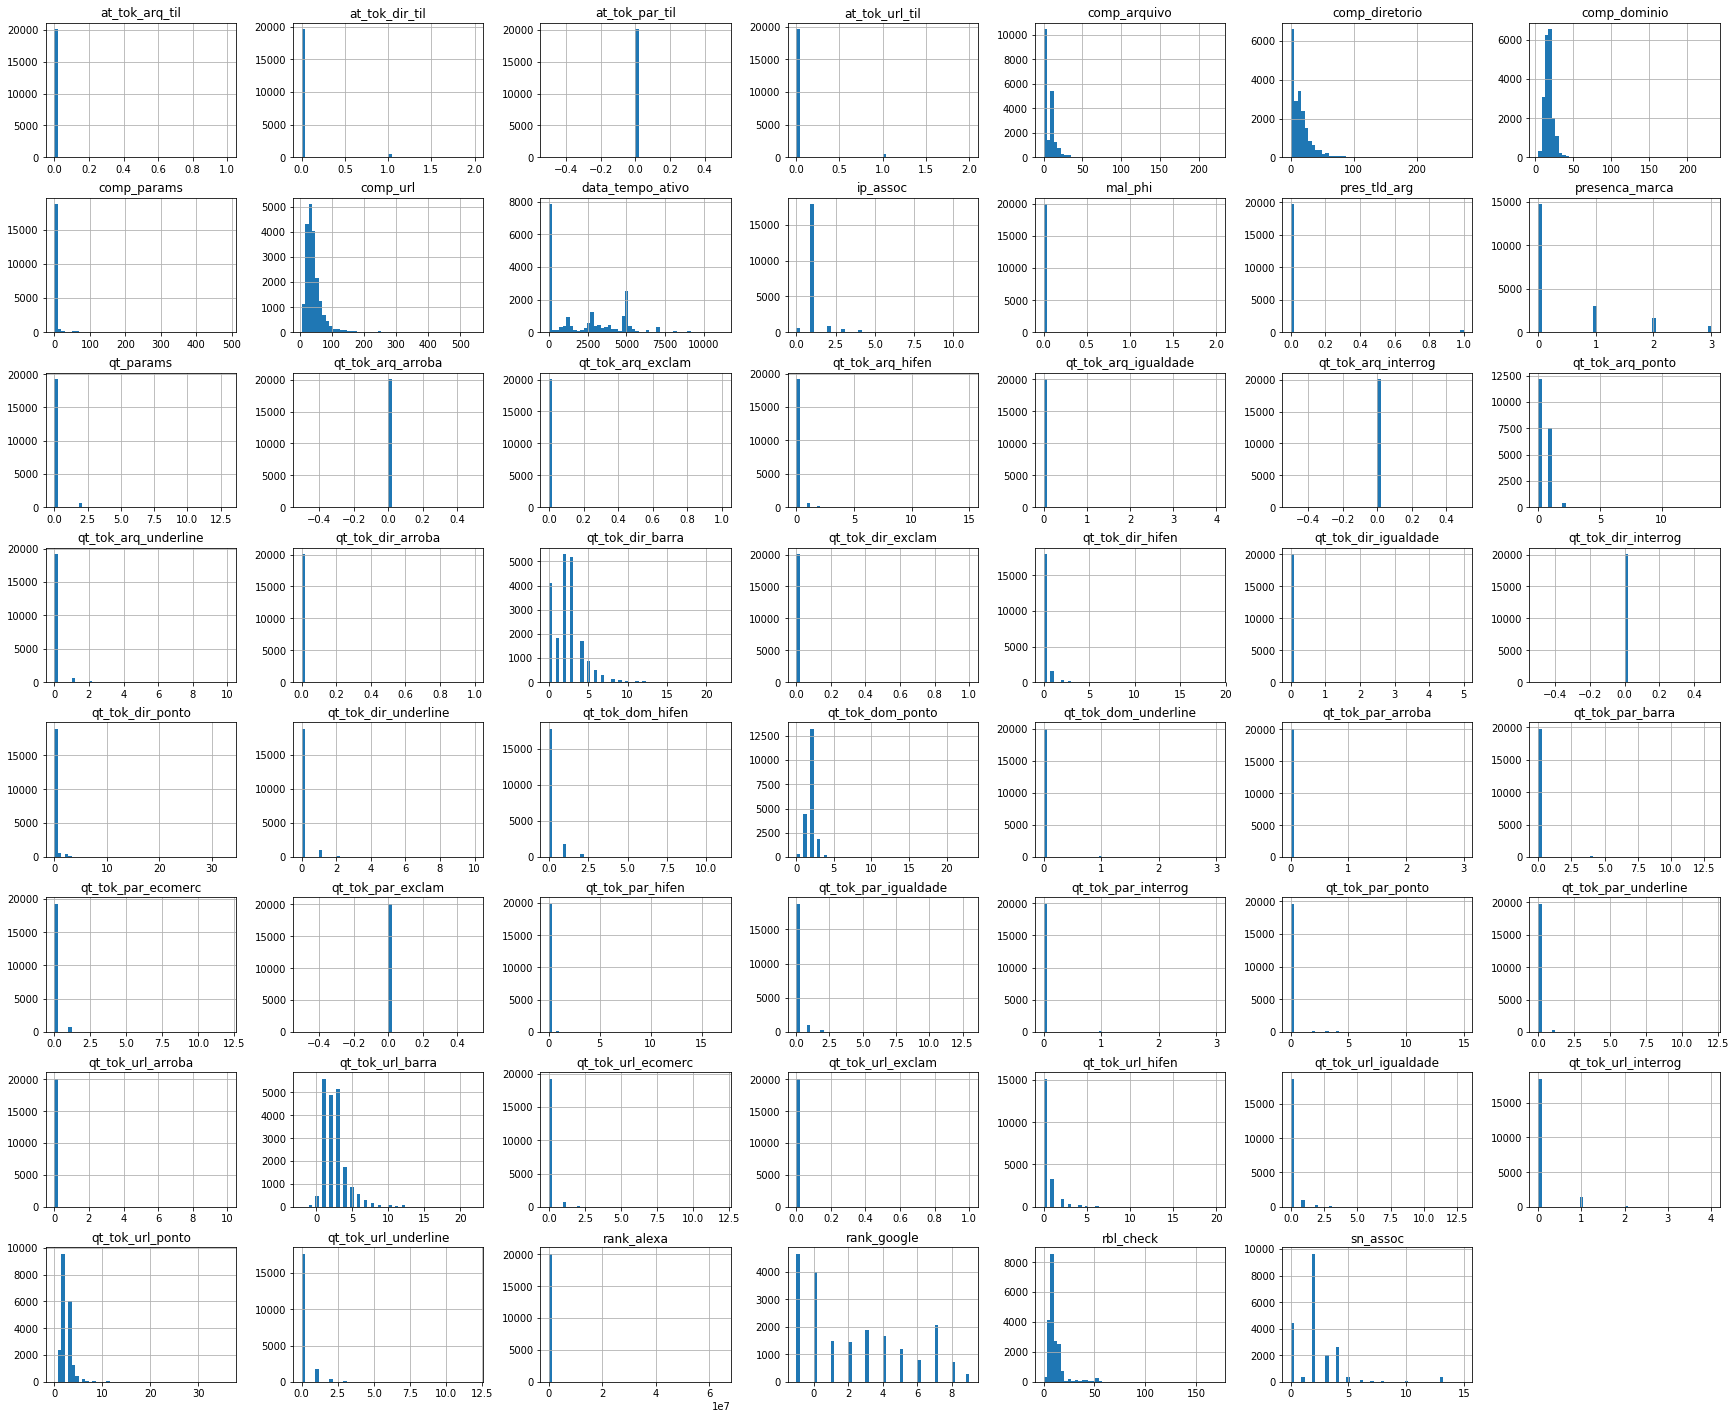

In [7]:
base.hist(bins=50, figsize=(30,25))
plt.show()

## Transformação dos Dados

### Conversão para binários

In [8]:
for c in colunas:
    dummies = pd.get_dummies(base[c], prefix = c)
    base = base.drop(c, axis = 1).join(dummies)

In [9]:
base.head(3)

,classe,qt_tok_dom_ponto_0,qt_tok_dom_ponto_1,qt_tok_dom_ponto_2,qt_tok_dom_ponto_3,qt_tok_dom_ponto_4,qt_tok_dom_ponto_5,qt_tok_dom_ponto_6,qt_tok_dom_ponto_7,qt_tok_dom_ponto_8,...,rbl_check_89,rbl_check_90,rbl_check_92,rbl_check_103,rbl_check_104,rbl_check_105,rbl_check_111,rbl_check_123,rbl_check_138,rbl_check_170
0,benigna,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,benigna,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,benigna,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


A função 'get_dummies' transforma os campos em atributos binários. Logo, podemos incorporar esses novos campos ao dataframe

In [10]:
base['classe'] = base['classe'].astype('category').cat.codes

transforma a class em número

In [11]:
base.head()

,classe,qt_tok_dom_ponto_0,qt_tok_dom_ponto_1,qt_tok_dom_ponto_2,qt_tok_dom_ponto_3,qt_tok_dom_ponto_4,qt_tok_dom_ponto_5,qt_tok_dom_ponto_6,qt_tok_dom_ponto_7,qt_tok_dom_ponto_8,...,rbl_check_89,rbl_check_90,rbl_check_92,rbl_check_103,rbl_check_104,rbl_check_105,rbl_check_111,rbl_check_123,rbl_check_138,rbl_check_170
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
base.classe.value_counts()

1    10046
0    10046
Name: classe, dtype: int64

Exibe a quantidade de linhas e colunas (atributos)

In [13]:
y = base['classe'].values
X = base.drop("classe", axis=1).values

In [14]:
y

array([0, 0, 0, ..., 1, 1, 1], dtype=int8)

In [15]:
X.shape

(20092, 2713)

In [16]:
X[:1]

array([[0, 0, 1, ..., 0, 0, 0]], dtype=uint8)

In [17]:
y.shape

(20092,)

In [18]:
y[:1]

array([0], dtype=int8)

## Resultados

Os experimentos foram executados para cada algoritmos: Random Forest, SVM, Naive Bayes, Decision Trees, Nearest Neighbors, Rede Neural Simples, Rede Neural com normalização em Batch, Rede Neural com Dropout e Rede Neural com normalização em Batch e Dropout. Foi utilizado Kfolds k=10 dividir a base em 10 subconjuntos (treinamento e teste).

Validação cruzada K-Folds
Fornece índices de treino / teste para dividir os dados nos conjuntos de treinamento / teste. Dividir o conjunto de dados em k dobras consecutivas (sem embaralhar por padrão). Cada dobra é então usada uma vez como validação, enquanto as dobras remanescentes k - 1 formam o conjunto de treino.

No aprendizado de máquina, geralmente dividimos o conjunto de dados em conjunto de dados de treinamento, conjunto de dados de validação e conjunto de dados de teste.

In [19]:
kf = StratifiedKFold(n_splits=10)
kf.get_n_splits(X,y)
print(kf)
#KFold(n_splits=10, random_state=None, shuffle=False)
#for train_index, test_index in kf.split(X):
#    X_train, X_test = X[train_index], X[test_index]
#    y_train, y_test = y[train_index], y[test_index]

StratifiedKFold(n_splits=10, random_state=None, shuffle=False)


# Algoritmos de Aprendizagem de Máquina

## Random Forest

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [22]:
n_estimators = 300
acc = []
prec = []
rec = []
f1 = []
mc = []
t1=time.time()
y_hat = np.zeros(len(X))

for train_index, test_index in kf.split(X,y): 
    clf_rf = RandomForestClassifier(n_estimators=n_estimators, random_state=50)
    clf_rf.fit(X[train_index], y[train_index])
    y_hat[test_index] = clf_rf.predict(X[test_index])

t2=time.time()

acc = accuracy_score(y, y_hat)
prec = precision_score(y, y_hat)
rec = recall_score(y, y_hat)
f1 = (2*prec*rec)/(prec+rec)
mc = confusion_matrix(y, y_hat)

temp = (t2-t1) # tempo (s) 

print(acc)
print(prec)
print(rec)
print(f1)
print(mc)
print(temp)


labels = {'n_estimators':n_estimators, 'accuracy_rf':acc, 'rate precision':prec, 'rate recall':rec, 'f1':f1, 'confusion matrix':mc, 'tempo':temp}
results1 = 'results1' 
with open(os.path.join(results1, '/home/maria/jupyter/results1/random_forest_1.txt'), 'w') as fp:
    for i in labels:
        fp.write('{}:{}\n'.format(i,labels[i]))



0.8976707147123233
0.8715587797619048
0.9328090782400955
0.9011443408020002
[[8665 1381]
 [ 675 9371]]
857.5582392215729


Feature Importance

In [23]:
for name, importance in zip(base.drop("classe", axis=1).columns, clf_rf.feature_importances_):
    print(name,importance)

qt_tok_dom_ponto_0 0.0
qt_tok_dom_ponto_1 0.030897632778781253
qt_tok_dom_ponto_2 0.02619668475814228
qt_tok_dom_ponto_3 0.0038361474462244196
qt_tok_dom_ponto_4 0.0008214575958192822
qt_tok_dom_ponto_5 0.0002943303218823175
qt_tok_dom_ponto_6 9.779400484662177e-05
qt_tok_dom_ponto_7 1.3606919680184443e-05
qt_tok_dom_ponto_8 4.720949608561923e-05
qt_tok_dom_ponto_9 3.5493181685479934e-05
qt_tok_dom_ponto_10 3.26258467355499e-05
qt_tok_dom_ponto_11 2.2296793108016183e-05
qt_tok_dom_ponto_12 1.0260373301690722e-05
qt_tok_dom_ponto_13 1.6203581627553097e-05
qt_tok_dom_ponto_14 4.359406794384159e-06
qt_tok_dom_ponto_15 1.7205842362650914e-05
qt_tok_dom_ponto_17 5.607763508963207e-06
qt_tok_dom_ponto_23 7.717250137511953e-06
qt_tok_dom_hifen_0.0 0.007495596257061732
qt_tok_dom_hifen_1.0 0.003643446239875914
qt_tok_dom_hifen_2.0 0.002508799476608123
qt_tok_dom_hifen_3.0 0.00020315646317238124
qt_tok_dom_hifen_4.0 3.6122344309617076e-05
qt_tok_dom_hifen_5.0 3.908532688693342e-05
qt_tok_dom_hi

comp_diretorio_164 1.3137117098671213e-05
comp_diretorio_166 1.7539102783497287e-06
comp_diretorio_167 6.230729005914277e-07
comp_diretorio_172 0.0
comp_diretorio_175 5.152740247298553e-07
comp_diretorio_178 7.910253776196858e-07
comp_diretorio_181 6.85115601854396e-07
comp_diretorio_182 1.746239443970134e-08
comp_diretorio_194 1.2544610367958164e-05
comp_diretorio_195 4.065865500166212e-05
comp_diretorio_198 4.580590471181641e-09
comp_diretorio_203 5.421928593500073e-09
comp_diretorio_208 3.2977564077510704e-06
comp_diretorio_215 1.992810575182775e-06
comp_diretorio_275 2.3930203194435906e-06
comp_arquivo_0 0.014133051489194677
comp_arquivo_2 0.0002571728842760096
comp_arquivo_3 0.0009918287482739816
comp_arquivo_4 0.0007171333830177978
comp_arquivo_5 0.001750730321616114
comp_arquivo_6 0.0015491969962377955
comp_arquivo_7 0.0014468720834817685
comp_arquivo_8 0.0011812075748524277
comp_arquivo_9 0.010266779121345172
comp_arquivo_10 0.0020916511972151313
comp_arquivo_11 0.0017496863179

sn_assoc_5 0.0011540063925417209
sn_assoc_6 0.0005736127128581421
sn_assoc_7 0.00012634272151779992
sn_assoc_8 0.00021725488895945258
sn_assoc_9 4.496582277324246e-06
sn_assoc_10 0.0004520694116534308
sn_assoc_11 4.0332583487307685e-06
sn_assoc_12 3.927658774829168e-06
sn_assoc_13 0.0
sn_assoc_15 9.64829690138053e-06
data_tempo_ativo_0 0.0315537026696296
data_tempo_ativo_50 0.0
data_tempo_ativo_57 2.3077163401737e-05
data_tempo_ativo_65 1.179734294393347e-06
data_tempo_ativo_78 7.756782689616099e-08
data_tempo_ativo_83 1.4452484123647781e-05
data_tempo_ativo_84 8.314292949367994e-08
data_tempo_ativo_98 3.8382522164435925e-06
data_tempo_ativo_106 1.6203492866834012e-05
data_tempo_ativo_112 1.745636131272996e-05
data_tempo_ativo_120 4.63700072575878e-06
data_tempo_ativo_121 2.947521595144351e-06
data_tempo_ativo_126 2.7062373298907462e-08
data_tempo_ativo_133 8.54481109337434e-05
data_tempo_ativo_134 1.1234383650089225e-06
data_tempo_ativo_140 2.365511562286052e-05
data_tempo_ativo_142 4

data_tempo_ativo_3523 6.99136998824111e-06
data_tempo_ativo_3527 9.33609381010933e-05
data_tempo_ativo_3528 5.599196163105341e-06
data_tempo_ativo_3531 1.152583664897636e-06
data_tempo_ativo_3548 3.6791241346884973e-06
data_tempo_ativo_3555 9.050696185926717e-08
data_tempo_ativo_3556 1.0638274740146388e-07
data_tempo_ativo_3576 0.00013414521368393972
data_tempo_ativo_3590 0.0
data_tempo_ativo_3613 0.00028336891693202677
data_tempo_ativo_3614 3.723277337779355e-05
data_tempo_ativo_3616 4.346029698570794e-05
data_tempo_ativo_3618 2.615688937325657e-05
data_tempo_ativo_3619 6.705790933991291e-07
data_tempo_ativo_3620 9.715676534031946e-06
data_tempo_ativo_3624 0.0007762904907954313
data_tempo_ativo_3625 1.3382497457230595e-05
data_tempo_ativo_3627 5.319400087925573e-05
data_tempo_ativo_3628 1.2790936353412044e-05
data_tempo_ativo_3638 7.420962643530487e-05
data_tempo_ativo_3639 9.091319602723706e-05
data_tempo_ativo_3644 6.352592930462941e-05
data_tempo_ativo_3645 0.0
data_tempo_ativo_365

geo_localizacao_RO 0.0007382167452372266
geo_localizacao_RS 0.00014586902106261644
geo_localizacao_RU 0.0006381853607182295
geo_localizacao_SA 1.6079183162468153e-05
geo_localizacao_SE 0.0001497217376652791
geo_localizacao_SG 0.00015045609975617206
geo_localizacao_SI 5.173125058486099e-05
geo_localizacao_SK 0.00015382740937666794
geo_localizacao_SV 0.00011711027667569763
geo_localizacao_TH 0.0003259194570207316
geo_localizacao_TN 5.37191138160343e-06
geo_localizacao_TR 0.0025940547739580736
geo_localizacao_TW 7.26774517842074e-05
geo_localizacao_TZ 9.385428880431404e-06
geo_localizacao_UA 0.0001881009242818429
geo_localizacao_US 0.03150891531184832
geo_localizacao_UZ 0.0
geo_localizacao_VE 0.0
geo_localizacao_VG 0.0
geo_localizacao_VN 0.0
geo_localizacao_ZA 0.0
rank_google_-1 0.03519212223943399
rank_google_0 0.050274315418727726
rank_google_1 0.005184294767768339
rank_google_2 0.004712771951179159
rank_google_3 0.009325023908974748
rank_google_4 0.011159144063255216
rank_google_5 0.01

Exibe as importâncias dos atributos na base

## SVM

In [70]:
from sklearn import svm
from sklearn.metrics import accuracy_score

In [72]:
C=60
acc = []
prec = []
rec = []
f1 = []
mc = []
t1=time.time()
y_hat = np.zeros(len(X))

for train_index, test_index in kf.split(X,y): 
    clf_svm = svm.SVC(C=C, random_state=42)
    clf_svm.fit(X[train_index], y[train_index])
    y_hat[test_index] = clf_svm.predict(X[test_index])

t2=time.time()

acc = accuracy_score(y, y_hat)
prec = precision_score(y, y_hat)
rec = recall_score(y, y_hat)
f1 = (2*prec*rec)/(prec+rec)
mc = confusion_matrix(y, y_hat)

temp = (t2-t1) # tempo (s) 

print(acc)
print(prec)
print(rec)
print(f1)
print(mc)
print(temp)


labels = {'c':c, 'accuracy_svm':acc, 'rate precision':prec, 'rate recall':rec, 'f1':f1, 'confusion matrix':mc, 'tempo':temp}
results1 = 'results1' 
with open(os.path.join(results1, '/home/maria/jupyter/results1/svm_60.txt'), 'w') as fp:
    for i in labels:
        fp.write('{}:{}\n'.format(i,labels[i]))



/home/maria/tf/lib/python3.5/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


KeyboardInterrupt: 

## Naive Bayes

In [26]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

In [27]:
acc = []
prec = []
rec = []
f1 = []
mc = []
t1=time.time()
y_hat = np.zeros(len(X))

for train_index, test_index in kf.split(X,y): 
    clf_gnb = GaussianNB()
    clf_gnb.fit(X[train_index], y[train_index])
    y_hat[test_index] = clf_gnb.predict(X[test_index])

t2=time.time()

acc = accuracy_score(y, y_hat)
prec = precision_score(y, y_hat)
rec = recall_score(y, y_hat)
f1 = (2*prec*rec)/(prec+rec)
mc = confusion_matrix(y, y_hat)

temp = (t2-t1) # tempo (s) 

print(acc)
print(prec)
print(rec)
print(f1)
print(mc)
print(temp)

labels = {'accuracy_nb':acc, 'rate precision':prec, 'rate recall':rec, 'f1':f1, 'confusion matrix':mc, 'tempo':temp}
results1 = 'results1' 
with open(os.path.join(results1, '/home/maria/jupyter/results1/naive_bayes.txt'), 'w') as fp:
    for i in labels:
        fp.write('{}:{}\n'.format(i,labels[i]))



0.6890304598845312
0.7992436180271036
0.5048775632092375
0.618838457784285
[[8772 1274]
 [4974 5072]]
20.537110328674316


## Decision Trees

In [28]:
from sklearn import tree
from sklearn.metrics import accuracy_score

In [29]:
min_samples_split=10
acc = []
prec = []
rec = []
f1 = []
mc = []
t1=time.time()
y_hat = np.zeros(len(X))

for train_index, test_index in kf.split(X,y): 
    clf_dt = tree.DecisionTreeClassifier(min_samples_split=min_samples_split, random_state=42)
    clf_dt.fit(X[train_index], y[train_index])
    y_hat[test_index] = clf_dt.predict(X[test_index])

t2=time.time()

acc = accuracy_score(y, y_hat)
prec = precision_score(y, y_hat)
rec = recall_score(y, y_hat)
f1 = (2*prec*rec)/(prec+rec)
mc = confusion_matrix(y, y_hat)

temp = (t2-t1) # tempo (s) 

print(acc)
print(prec)
print(rec)
print(f1)
print(mc)
print(temp)

labels = {'min_samples_split':min_samples_split, 'accuracy_dt':acc, 'rate precision':prec, 'rate recall':rec, 'f1':f1, 'confusion matrix':mc, 'tempo':temp}
results1 = 'results1' 
with open(os.path.join(results1, '/home/maria/jupyter/results1/decision_tree_1.txt'), 'w') as fp:
    for i in labels:
        fp.write('{}:{}\n'.format(i,labels[i]))


0.8525283695002986
0.8564670357322597
0.8470037826000398
0.8517091236674841
[[8620 1426]
 [1537 8509]]
165.19683647155762


In [30]:
clf_dt = tree.DecisionTreeClassifier()
clf_dt

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

## Nearest Neighbors

In [31]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [32]:
n_neighbors=9
acc = []
prec = []
rec = []
f1 = []
mc = []
t1=time.time()
y_hat = np.zeros(len(X))

for train_index, test_index in kf.split(X,y):
    clf_neigh = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf_neigh.fit(X[train_index], y[train_index])
    y_hat[test_index] = clf_neigh.predict(X[test_index])

t2=time.time()

acc = accuracy_score(y, y_hat)
prec = precision_score(y, y_hat)
rec = recall_score(y, y_hat)
f1 = (2*prec*rec)/(prec+rec)
mc = confusion_matrix(y, y_hat)

temp = (t2-t1) # tempo (s) 

print(acc)
print(prec)
print(rec)
print(f1)
print(mc)
print(temp)

labels = {'n_neighbors':n_neighbors, 'accuracy_nn':acc, 'rate precision':prec, 'rate recall':rec, 'f1':f1, 'confusion matrix':mc, 'tempo':temp}
results1 = 'results1' 
with open(os.path.join(results1, '/home/maria/jupyter/results1/knn_1.txt'), 'w') as fp:
    for i in labels:
        fp.write('{}:{}\n'.format(i,labels[i]))


0.854519211626518
0.9017484489565708
0.7957395978498905
0.8454338744645973
[[9175  871]
 [2052 7994]]
1772.6503553390503


In [33]:
clf_neigh = KNeighborsClassifier()
clf_neigh

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

## Adaboost

In [68]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

In [69]:
n_estimators = 50
learning_rate=1.0
acc = []
prec = []
rec = []
f1 = []
mc = []
t1=time.time()
y_hat = np.zeros(len(X))

for train_index, test_index in kf.split(X,y): 
    clf_ad = AdaBoostClassifier(n_estimators=n_estimators, learning_rate=learning_rate, algorithm='SAMME.R', random_state=42)
    clf_ad.fit(X[train_index], y[train_index])
    y_hat[test_index] = clf_ad.predict(X[test_index])

t2=time.time()

acc = accuracy_score(y, y_hat)
prec = precision_score(y, y_hat)
rec = recall_score(y, y_hat)
f1 = (2*prec*rec)/(prec+rec)
mc = confusion_matrix(y, y_hat)

temp = (t2-t1) # tempo (s) 

print(acc)
print(prec)
print(rec)
print(f1)
print(mc)
print(temp)

labels = {'n_estimators':n_estimators, 'learning_rate':learning_rate, 'accuracy_dt':acc, 'rate precision':prec, 'rate recall':rec, 'f1':f1, 'confusion matrix':mc, 'tempo':temp}
results1 = 'results1' 
with open(os.path.join(results1, '/home/maria/jupyter/results1/ad_50.txt'), 'w') as fp:
    for i in labels:
        fp.write('{}:{}\n'.format(i,labels[i]))


0.8243081823611388
0.862
0.7722476607605017
0.8146592460359131
[[8804 1242]
 [2288 7758]]
952.6409547328949


# Rede Neural

Os parâmetros modificados foram: a camada de entrada [10~200], nas camadas escondidas [100 e 200], a função de ativação hard_sigmoid() e relu() e Dropout [0.5 e 0.7]. Foram utilizadas 3 camadas escondidas, 1 camada de saída (função de ativação hard_sigmoid()) e 1000 épocas.

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10)

## Rede Neural Simples

In [38]:
def plot_model_history(model_history):
    # summarize history for loss
    plt.plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    plt.plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['train', 'val'], loc='best')
    plt.show()
    

In [39]:
def get_model(X_input_size):
    '''
        get_model cria um modelo de rede neural  
        X_input_size: número de atributos em X
    '''
    input_data = Input(name='input', shape=(X_input_size,), dtype='float32')
    
    x = input_data
    x = Dense(units = 200)(x)
    x = Activation('relu')(x)
      
    #--------------------------
    x = Dense(units = 200)(x)
    x = Activation('softmax')(x)
    
    x = Dense(units = 200)(x)
    x = Activation('softmax')(x)
    
    x = Dense(units = 200)(x)
    x = Activation('softmax')(x)
    #--------------------------
    
    x = Dense(units = 1)(x)
    y_pred = Activation('relu')(x)
    
    model = Model(inputs=input_data, outputs=y_pred)
    
    # modelo será treinado com otimizador SGD -- vc pode trocar o otimizador
    #optimizer = SGD(lr=0.01, momentum=0.9, decay=1e-6, nesterov=True)
    optimizer = Adam(lr=0.0001)
    
    # função de custo usada é a entropia cruzada
    model.compile(loss='binary_crossentropy', optimizer = optimizer,metrics=['accuracy']) 
    
    return model

In [40]:
def train_model(model, X_train, X_test, y_train, y_test, 
                bsize = 20, n_epochs = 1000, val_proportion = 0.2, patience = 20):

    # estratégia de treino com parada antecipada consiste em parar o treino
    # quando nenhuma melhoria no erro de validação (val_loss) é observada após
    # "patience" épocas
    earlystop = EarlyStopping(monitor='val_loss', min_delta=0.00001, patience=patience, \
                verbose=1, mode='auto')
    callback_list = [earlystop]
    
    # Modelo usa parâmetros comuns que podem ser modificados
    h = model.fit(X_train, y_train, batch_size=bsize, epochs=n_epochs,validation_data=(X_test,y_test),
                  verbose=2, shuffle = True, callbacks = callback_list, 
                  validation_split=val_proportion)
    plot_model_history(h)          
    
    # avaliação
    print('\nEstimating AUCROC, acc')
    y_pred = model.predict(X_test, batch_size=len(y_test))
    print('ROC value: %.4f'%(sklearn_roc_auc_score(y_test, y_pred)))
    print('Acc: %.4f'%(sklearn_accuracy_score(y_test, y_pred>0.5)))
    print('CMatrix: %s'%(sklearn_confusion_matrix(y_test, y_pred>0.5)))
    
    return model

In [41]:
X_train.shape

(18082, 2713)

In [42]:
model=get_model(X_train.shape[1])

In [43]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           (None, 2713)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 200)               542800    
_________________________________________________________________
activation_1 (Activation)    (None, 200)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 200)               40200     
_________________________________________________________________
activation_2 (Activation)    (None, 200)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 200)               40200     
_________________________________________________________________
activation_3 (Activation)    (None, 200)               0         
__________

Train on 18082 samples, validate on 2010 samples
Epoch 1/1000
 - 9s - loss: 1.9633 - acc: 0.5002 - val_loss: 1.6137 - val_acc: 0.4985
Epoch 2/1000
 - 9s - loss: 1.4591 - acc: 0.5002 - val_loss: 1.3414 - val_acc: 0.4985
Epoch 3/1000
 - 9s - loss: 1.2480 - acc: 0.5002 - val_loss: 1.1714 - val_acc: 0.4985
Epoch 4/1000
 - 9s - loss: 1.1021 - acc: 0.5002 - val_loss: 1.0439 - val_acc: 0.4985
Epoch 5/1000
 - 9s - loss: 0.9882 - acc: 0.5002 - val_loss: 0.9412 - val_acc: 0.4985
Epoch 6/1000
 - 9s - loss: 0.8959 - acc: 0.5002 - val_loss: 0.8578 - val_acc: 0.4985
Epoch 7/1000
 - 9s - loss: 0.8219 - acc: 0.5002 - val_loss: 0.7923 - val_acc: 0.4985
Epoch 8/1000
 - 9s - loss: 0.7655 - acc: 0.5002 - val_loss: 0.7441 - val_acc: 0.4985
Epoch 9/1000
 - 9s - loss: 0.7268 - acc: 0.5002 - val_loss: 0.7140 - val_acc: 0.4985
Epoch 10/1000
 - 9s - loss: 0.7051 - acc: 0.5002 - val_loss: 0.6992 - val_acc: 0.4985
Epoch 11/1000
 - 9s - loss: 0.6961 - acc: 0.5002 - val_loss: 0.6944 - val_acc: 0.4985
Epoch 12/1000


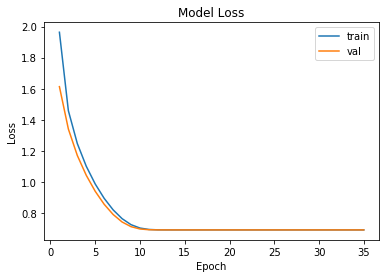


Estimating AUCROC, acc
ROC value: 0.4970
Acc: 0.4985
CMatrix: [[1002    0]
 [1008    0]]


In [44]:
train_model(model, X_train, X_test, y_train, y_test, 
                bsize = 20, n_epochs = 1000, val_proportion = 0.2, patience = 20)


## Rede Neural com normalização em Batch

In [45]:
def plot_model_history(model_history):
    # summarize history for loss
    plt.plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    plt.plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['train', 'val'], loc='best')
    plt.show()

In [46]:
def get_model(X_input_size):
    '''
        get_model cria um modelo de rede neural  
        X_input_size: número de atributos em X
    '''
    input_data = Input(name='input', shape=(X_input_size,), dtype='float32')
    
    x = input_data
    x = Dense(units = 80)(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
     
    #--------------------------
    x = Dense(units = 200)(x)
    x = BatchNormalization()(x)
    x = Activation('softmax')(x)
    
    x = Dense(units = 200)(x)
    x = BatchNormalization()(x)
    x = Activation('softmax')(x)
    
    x = Dense(units = 200)(x)
    x = BatchNormalization()(x)
    x = Activation('softmax')(x)      
    #--------------------------
    
    x = Dense(units = 1)(x)
    y_pred = Activation('relu')(x)
    
    model = Model(inputs=input_data, outputs=y_pred)
    
    # modelo será treinado com otimizador SGD -- vc pode trocar o otimizador
    #optimizer = SGD(lr=0.01, momentum=0.9, decay=1e-6, nesterov=True)
    optimizer = Adam(lr=0.0001)
    
    # função de custo usada é a entropia cruzada
    model.compile(loss='binary_crossentropy', optimizer = optimizer,metrics=['accuracy']) 
    
    return model

In [47]:
def train_model(model, X_train, X_test, y_train, y_test, 
                bsize = 20, n_epochs = 1000, val_proportion = 0.2, patience = 20):

    # estratégia de treino com parada antecipada consiste em parar o treino
    # quando nenhuma melhoria no erro de validação (val_loss) é observada após
    # "patience" épocas
    earlystop = EarlyStopping(monitor='val_loss', min_delta=0.00001, patience=patience, \
                verbose=1, mode='auto')
    callback_list = [earlystop]
    
    # Modelo usa parâmetros comuns que podem ser modificados
    h = model.fit(X_train, y_train, batch_size=bsize, epochs=n_epochs,validation_data=(X_test,y_test),
                  verbose=2, shuffle = True, callbacks = callback_list, 
                  validation_split=val_proportion)
    plot_model_history(h)          
    
    # avaliação
    print('\nEstimating AUCROC, acc')
    y_pred = model.predict(X_test, batch_size=len(y_test))
    print('ROC value: %.4f'%(sklearn_roc_auc_score(y_test, y_pred)))
    print('Acc: %.4f'%(sklearn_accuracy_score(y_test, y_pred>0.5)))
    print('CMatrix: %s'%(sklearn_confusion_matrix(y_test, y_pred>0.5)))
    
    return model

In [48]:
X_train.shape

(18082, 2713)

In [49]:
model=get_model(X_train.shape[1])

In [50]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           (None, 2713)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 80)                217120    
_________________________________________________________________
batch_normalization_1 (Batch (None, 80)                320       
_________________________________________________________________
activation_6 (Activation)    (None, 80)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 200)               16200     
_________________________________________________________________
batch_normalization_2 (Batch (None, 200)               800       
_________________________________________________________________
activation_7 (Activation)    (None, 200)               0         
__________

Train on 18082 samples, validate on 2010 samples
Epoch 1/1000
 - 9s - loss: 1.5470 - acc: 0.5002 - val_loss: 1.1204 - val_acc: 0.4985
Epoch 2/1000
 - 8s - loss: 1.0110 - acc: 0.5002 - val_loss: 0.9101 - val_acc: 0.4985
Epoch 3/1000
 - 8s - loss: 0.8474 - acc: 0.5002 - val_loss: 0.7767 - val_acc: 0.4985
Epoch 4/1000
 - 8s - loss: 0.7196 - acc: 0.5002 - val_loss: 0.6612 - val_acc: 0.4985
Epoch 5/1000
 - 8s - loss: 0.6114 - acc: 0.5002 - val_loss: 0.5544 - val_acc: 0.4985
Epoch 6/1000
 - 8s - loss: 0.5160 - acc: 0.5003 - val_loss: 0.4644 - val_acc: 0.4985
Epoch 7/1000
 - 8s - loss: 0.4260 - acc: 0.7432 - val_loss: 0.3845 - val_acc: 0.9363
Epoch 8/1000
 - 8s - loss: 0.3427 - acc: 0.9539 - val_loss: 0.3005 - val_acc: 0.9627
Epoch 9/1000
 - 8s - loss: 0.2603 - acc: 0.9710 - val_loss: 0.2253 - val_acc: 0.9672
Epoch 10/1000
 - 8s - loss: 0.1864 - acc: 0.9747 - val_loss: 0.1654 - val_acc: 0.9647
Epoch 11/1000
 - 8s - loss: 0.1267 - acc: 0.9776 - val_loss: 0.1175 - val_acc: 0.9697
Epoch 12/1000


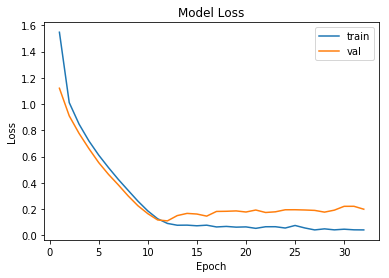


Estimating AUCROC, acc
ROC value: 0.9902
Acc: 0.9667
CMatrix: [[957  45]
 [ 22 986]]


In [51]:
train_model(model, X_train, X_test, y_train, y_test, 
                bsize = 20, n_epochs = 1000, val_proportion = 0.2, patience = 20)

## Rede Neural com Dropout

In [52]:
def plot_model_history(model_history):
    # summarize history for loss
    plt.plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    plt.plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['train', 'val'], loc='best')
    plt.show()

In [53]:
def get_model(X_input_size):
    '''
        get_model cria um modelo de rede neural  
        X_input_size: número de atributos em X
    '''
    input_data = Input(name='input', shape=(X_input_size,), dtype='float32')
    
    x = input_data
    x = Dense(units = 200)(x)
    x = Activation('relu')(x)
    x = Dropout(0.7)(x)
    
    #--------------------------
    x = Dense(units = 200)(x)
    x = Activation('softmax')(x)
    x = Dropout(0.7)(x)   
    
    x = Dense(units = 200)(x)
    x = Activation('softmax')(x)
    x = Dropout(0.7)(x) 
    
    x = Dense(units = 200)(x)
    x = Activation('softmax')(x)
    x = Dropout(0.7)(x)    
    #--------------------------
    
    x = Dense(units = 1)(x)
    y_pred = Activation('relu')(x)
    
    model = Model(inputs=input_data, outputs=y_pred)
    
    # modelo será treinado com otimizador SGD -- vc pode trocar o otimizador
    #optimizer = SGD(lr=0.01, momentum=0.9, decay=1e-6, nesterov=True)
    optimizer = Adam(lr=0.0001)
    
    # função de custo usada é a entropia cruzada
    model.compile(loss='binary_crossentropy', optimizer = optimizer,metrics=['accuracy']) 
    
    return model

In [54]:
def train_model(model, X_train, X_test, y_train, y_test, 
                bsize = 20, n_epochs = 1000, val_proportion = 0.2, patience = 20):

    # estratégia de treino com parada antecipada consiste em parar o treino
    # quando nenhuma melhoria no erro de validação (val_loss) é observada após
    # "patience" épocas
    earlystop = EarlyStopping(monitor='val_loss', min_delta=0.00001, patience=patience, \
                verbose=1, mode='auto')
    callback_list = [earlystop]
    
    # Modelo usa parâmetros comuns que podem ser modificados
    h = model.fit(X_train, y_train, batch_size=bsize, epochs=n_epochs,validation_data=(X_test,y_test),
                  verbose=2, shuffle = True, callbacks = callback_list, 
                  validation_split=val_proportion)
    plot_model_history(h)          
    
    # avaliação
    print('\nEstimating AUCROC, acc')
    y_pred = model.predict(X_test, batch_size=len(y_test))
    print('ROC value: %.4f'%(sklearn_roc_auc_score(y_test, y_pred)))
    print('Acc: %.4f'%(sklearn_accuracy_score(y_test, y_pred>0.5)))
    print('CMatrix: %s'%(sklearn_confusion_matrix(y_test, y_pred>0.5)))
    
    return model

In [55]:
X_train.shape

(18082, 2713)

In [56]:
model=get_model(X_train.shape[1])

In [57]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           (None, 2713)              0         
_________________________________________________________________
dense_11 (Dense)             (None, 200)               542800    
_________________________________________________________________
activation_11 (Activation)   (None, 200)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 200)               40200     
_________________________________________________________________
activation_12 (Activation)   (None, 200)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 200)               0         
__________

Train on 18082 samples, validate on 2010 samples
Epoch 1/1000
 - 11s - loss: 1.3715 - acc: 0.5002 - val_loss: 1.1237 - val_acc: 0.4985
Epoch 2/1000
 - 10s - loss: 1.0128 - acc: 0.5002 - val_loss: 0.9261 - val_acc: 0.4985
Epoch 3/1000
 - 10s - loss: 0.8679 - acc: 0.5002 - val_loss: 0.8192 - val_acc: 0.4985
Epoch 4/1000
 - 10s - loss: 0.7850 - acc: 0.5002 - val_loss: 0.7553 - val_acc: 0.4985
Epoch 5/1000
 - 10s - loss: 0.7353 - acc: 0.5002 - val_loss: 0.7189 - val_acc: 0.4985
Epoch 6/1000
 - 10s - loss: 0.7097 - acc: 0.5006 - val_loss: 0.7016 - val_acc: 0.4985
Epoch 7/1000
 - 10s - loss: 0.6995 - acc: 0.4993 - val_loss: 0.6951 - val_acc: 0.4985
Epoch 8/1000
 - 10s - loss: 0.6958 - acc: 0.5007 - val_loss: 0.6935 - val_acc: 0.4985
Epoch 9/1000
 - 10s - loss: 0.6952 - acc: 0.5013 - val_loss: 0.6932 - val_acc: 0.4985
Epoch 10/1000
 - 10s - loss: 0.6959 - acc: 0.4988 - val_loss: 0.6932 - val_acc: 0.4985
Epoch 11/1000
 - 10s - loss: 0.6954 - acc: 0.5011 - val_loss: 0.6932 - val_acc: 0.4985
Epo

Epoch 105/1000
 - 11s - loss: 0.4380 - acc: 0.8439 - val_loss: 0.1816 - val_acc: 0.9617
Epoch 106/1000
 - 11s - loss: 0.4275 - acc: 0.8492 - val_loss: 0.1792 - val_acc: 0.9622
Epoch 107/1000
 - 11s - loss: 0.4447 - acc: 0.8490 - val_loss: 0.1784 - val_acc: 0.9622
Epoch 108/1000
 - 11s - loss: 0.4221 - acc: 0.8573 - val_loss: 0.1703 - val_acc: 0.9602
Epoch 109/1000
 - 11s - loss: 0.4393 - acc: 0.8496 - val_loss: 0.1687 - val_acc: 0.9622
Epoch 110/1000
 - 11s - loss: 0.4145 - acc: 0.8524 - val_loss: 0.1674 - val_acc: 0.9642
Epoch 111/1000
 - 11s - loss: 0.4226 - acc: 0.8544 - val_loss: 0.1577 - val_acc: 0.9622
Epoch 112/1000
 - 11s - loss: 0.4110 - acc: 0.8563 - val_loss: 0.1584 - val_acc: 0.9637
Epoch 113/1000
 - 11s - loss: 0.4128 - acc: 0.8601 - val_loss: 0.1527 - val_acc: 0.9632
Epoch 114/1000
 - 11s - loss: 0.3986 - acc: 0.8661 - val_loss: 0.1547 - val_acc: 0.9632
Epoch 115/1000
 - 11s - loss: 0.4024 - acc: 0.8651 - val_loss: 0.1514 - val_acc: 0.9632
Epoch 116/1000
 - 11s - loss: 0.

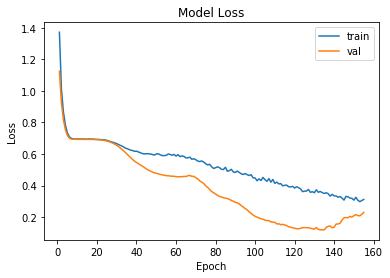


Estimating AUCROC, acc
ROC value: 0.9895
Acc: 0.9652
CMatrix: [[970  32]
 [ 38 970]]


In [58]:
train_model(model, X_train, X_test, y_train, y_test, 
                bsize = 20, n_epochs = 1000, val_proportion = 0.2, patience = 20)

## Rede Neural com  normalização em Batch e Dropout

In [59]:
def plot_model_history(model_history):
    # summarize history for loss
    plt.plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    plt.plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['train', 'val'], loc='best')
    plt.show()

In [60]:
def get_model(X_input_size):
    '''
        get_model cria um modelo de rede neural  
        X_input_size: número de atributos em X
    '''
    input_data = Input(name='input', shape=(X_input_size,), dtype='float32')
    
    x = input_data
    x = Dense(units = 200)(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Dropout(0.7)(x)
    
    #--------------------------
    x = Dense(units = 200)(x)
    x = BatchNormalization()(x)
    x = Activation('softmax')(x)
    x = Dropout(0.7)(x)   
    
    x = Dense(units = 200)(x)
    x = BatchNormalization()(x)
    x = Activation('softmax')(x)
    x = Dropout(0.7)(x)  
    
    x = Dense(units = 200)(x)
    x = BatchNormalization()(x)
    x = Activation('softmax')(x)
    x = Dropout(0.7)(x)    
    #--------------------------
    
    x = Dense(units = 1)(x)
    y_pred = Activation('relu')(x)
    
    model = Model(inputs=input_data, outputs=y_pred)
    
    # modelo será treinado com otimizador SGD -- vc pode trocar o otimizador
    #optimizer = SGD(lr=0.01, momentum=0.9, decay=1e-6, nesterov=True)
    optimizer = Adam(lr=0.0001)
    
    # função de custo usada é a entropia cruzada
    model.compile(loss='binary_crossentropy', optimizer = optimizer,metrics=['accuracy']) 
    
    return model

In [61]:
def train_model(model, X_train, X_test, y_train, y_test, 
                bsize = 20, n_epochs = 1000, val_proportion = 0.2, patience = 20):

    # estratégia de treino com parada antecipada consiste em parar o treino
    # quando nenhuma melhoria no erro de validação (val_loss) é observada após
    # "patience" épocas
    earlystop = EarlyStopping(monitor='val_loss', min_delta=0.00001, patience=patience, \
                verbose=1, mode='auto')
    callback_list = [earlystop]
    
    # Modelo usa parâmetros comuns que podem ser modificados
    h = model.fit(X_train, y_train, batch_size=bsize, epochs=n_epochs,validation_data=(X_test,y_test),
                  verbose=2, shuffle = True, callbacks = callback_list, 
                  validation_split=val_proportion)
    plot_model_history(h)          
    
    # avaliação
    print('\nEstimating AUCROC, acc')
    y_pred = model.predict(X_test, batch_size=len(y_test))
    print('ROC value: %.4f'%(sklearn_roc_auc_score(y_test, y_pred)))
    print('Acc: %.4f'%(sklearn_accuracy_score(y_test, y_pred>0.5)))
    print('CMatrix: %s'%(sklearn_confusion_matrix(y_test, y_pred>0.5)))
    
    return model

In [62]:
X_train.shape

(18082, 2713)

In [63]:
model=get_model(X_train.shape[1])

In [64]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           (None, 2713)              0         
_________________________________________________________________
dense_16 (Dense)             (None, 200)               542800    
_________________________________________________________________
batch_normalization_5 (Batch (None, 200)               800       
_________________________________________________________________
activation_16 (Activation)   (None, 200)               0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 200)               40200     
_________________________________________________________________
batch_normalization_6 (Batch (None, 200)               800       
__________

Train on 18082 samples, validate on 2010 samples
Epoch 1/1000
 - 14s - loss: 2.8015 - acc: 0.5002 - val_loss: 1.8102 - val_acc: 0.4985
Epoch 2/1000
 - 13s - loss: 1.7514 - acc: 0.5002 - val_loss: 1.6314 - val_acc: 0.4985
Epoch 3/1000
 - 13s - loss: 1.5733 - acc: 0.5002 - val_loss: 1.4927 - val_acc: 0.4985
Epoch 4/1000
 - 13s - loss: 1.4373 - acc: 0.5002 - val_loss: 1.3709 - val_acc: 0.4985
Epoch 5/1000
 - 13s - loss: 1.3178 - acc: 0.5002 - val_loss: 1.2609 - val_acc: 0.4985
Epoch 6/1000
 - 13s - loss: 1.2094 - acc: 0.5002 - val_loss: 1.1580 - val_acc: 0.4985
Epoch 7/1000
 - 13s - loss: 1.1082 - acc: 0.5002 - val_loss: 1.0633 - val_acc: 0.4985
Epoch 8/1000
 - 13s - loss: 1.0171 - acc: 0.5002 - val_loss: 0.9749 - val_acc: 0.4985
Epoch 9/1000
 - 13s - loss: 0.9324 - acc: 0.5002 - val_loss: 0.8922 - val_acc: 0.4985
Epoch 10/1000
 - 13s - loss: 0.8484 - acc: 0.5002 - val_loss: 0.7988 - val_acc: 0.4985
Epoch 11/1000
 - 13s - loss: 0.7477 - acc: 0.5009 - val_loss: 0.6810 - val_acc: 0.4985
Epo

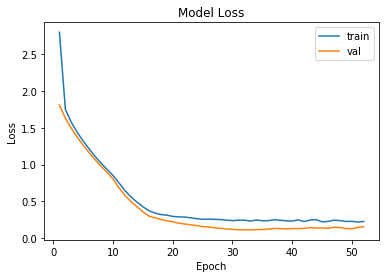


Estimating AUCROC, acc
ROC value: 0.9909
Acc: 0.9652
CMatrix: [[979  23]
 [ 47 961]]


In [65]:
train_model(model, X_train, X_test, y_train, y_test, 
                bsize = 20, n_epochs = 1000, val_proportion = 0.2, patience = 20)

In [ ]:
Rede Neural - LSTM

In [ ]:
keras.layers.LSTM(units, activation='tanh', 
    recurrent_activation='hard_sigmoid', use_bias=True, 
    kernel_initializer='glorot_uniform', 
    recurrent_initializer='orthogonal', 
    bias_initializer='zeros',
    unit_forget_bias=True,
                  
    kernel_regularizer=None, 
    recurrent_regularizer=None, 
    bias_regularizer=None, activity_regularizer=None,    
    kernel_constraint=None, recurrent_constraint=None, 
    bias_constraint=None, 
    dropout=0.0, recurrent_dropout=0.0, 
    implementation=1, return_sequences=False,
    return_state=False, go_backwards=False, 
    stateful=False, unroll=False)

In [ ]:
# First, let's define a RNN Cell, as a layer subclass.

class LSTM(keras.layers.LSTM):

    def __init__(self, units, **kwargs):
        self.units = units
        self.state_size = units
        super(LSTM, self).__init__(**kwargs)

    def build(self, input_shape):
        self.kernel = self.add_weight(shape=(input_shape[-1], self.units),
                                      initializer='uniform',
                                      name='kernel')
        self.recurrent_kernel = self.add_weight(
            shape=(self.units, self.units),
            initializer='uniform',
            name='recurrent_kernel')
        self.built = True

    def call(self, inputs, states):
        prev_output = states[0]
        h = K.dot(inputs, self.kernel)
        output = h + K.dot(prev_output, self.recurrent_kernel)
        return output, [output]

# Let's use this cell in a RNN layer:

cell = LSTM(32)
x = keras.Input((None, 5))
layer = LSTM(cell)
y = layer(x)

# Here's how to use the cell to build a stacked RNN:

cells = [LSTM(32), LSTM(64)]
x = keras.Input((None, 5))
layer = LSTM(cells)
y = layer(x)

In [ ]:
# First, let's define a RNN Cell, as a layer subclass.

class MinimalRNNCell(keras.layers.Layer):

    def __init__(self, units, **kwargs):
        self.units = units
        self.state_size = units
        super(MinimalRNNCell, self).__init__(**kwargs)

    def build(self, input_shape):
        self.kernel = self.add_weight(shape=(input_shape[-1], self.units),
                                      initializer='uniform',
                                      name='kernel')
        self.recurrent_kernel = self.add_weight(
            shape=(self.units, self.units),
            initializer='uniform',
            name='recurrent_kernel')
        self.built = True

    def call(self, inputs, states):
        prev_output = states[0]
        h = K.dot(inputs, self.kernel)
        output = h + K.dot(prev_output, self.recurrent_kernel)
        return output, [output]

# Let's use this cell in a RNN layer:

cell = MinimalRNNCell(32)
x = keras.Input((None, 5))
layer = RNN(cell)
y = layer(x)

# Here's how to use the cell to build a stacked RNN:

cells = [MinimalRNNCell(32), MinimalRNNCell(64)]
x = keras.Input((None, 5))
layer = RNN(cells)
y = layer(x)